## Keras: A high level neural network library

In this exercise, we will revisit classification using simple neural networks. To do so, we will use Keras, a popular neural network package. Keras is a high level library that allows rapid prototyping of neural networks due to its precompiled layers, just as Scikit-learn contains a number of prebuilt classifiers.


## Installing Keras

Detailed installation instructions can be found at https://keras.io/#installation

Installation is a two step process:
1. Install a deep learning backend (Tensorflow recommended)

``` pip install tensorflow ```
2. Install Keras

``` pip install Keras ```


To start the demo, we have a 2D dataset so we can visualize what the network is doing.

In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

Neural networks are so popular now due to their ability to quickly learn nonlinear boundaries. So, we have an example that would be impossible for a linear classifier and demonstrate how a neural network can be used to solve this. As you can see, in the dataset below there is no straight line that you can draw that perfectly separates the red and blue classes

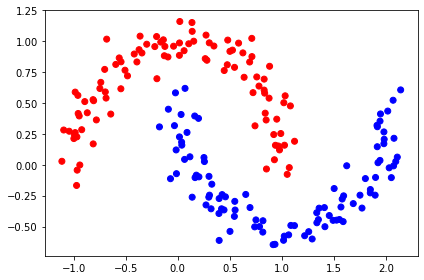

In [2]:
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from utils import lenses_dataset, get_colors, get_accuracy


X, y = lenses_dataset()

# For consistent color plotting:

cmap=get_colors(y)

plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap)
plt.tight_layout()
plt.show()

Let's split it into a training and testing set

In [4]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2)

We will build a perceptron using Keras as an example. Recall that a perceptron is a 0 hidden layer neural network with a single output unit. In Keras' terms, it's a single Dense layer with 1 unit. 

We will build this perceptron with a sigmoidal output (so it outputs a probability of class 1) and the binary_crossentropy loss function (which corresponds to sigmoid).

In [5]:
# Relevant imports
from keras.models import Sequential
# Keras refers to an architecture in which the outputs of 
# one layer are the inputs to the next as "Sequential"
from keras.layers import Dense
# Everything we've talked about in class so far is referred to in 
# Keras as a "dense" connection between layers, where every input 
# unit connects to a unit in the next layer
from keras.optimizers import SGD
# SGD is the learning algorithm we will use

# Exercise 1:

Q1. Let's first create neural network with 1 layer 

To add a layer to the architecture, you would simply use .add(LAYER).

Each "input_dim" of each layer should be the number units in the previous layer (in this case, the input), and the number of "units" should be the number of outputs of the layer (in this case, it will be 1).

In [6]:
### YOUR CODE HERE ### (2 lines)
perceptron = Sequential()
perceptron.add(Dense(units = 1, input_dim = 2, activation = 'sigmoid', name = 'perceptron'))


Now, we specify how to optimize the neural network. We mentioned gradient descent and stochastic gradient descent in class. Let's use the latter here and compile the model. We also specify the error function as "binary_crossentropy". 

In [7]:
sgd = SGD(lr = 0.001, decay = 1e-7, momentum = .9)  # Stochastic gradient descent
# edited his code to include accuracy metrics
perceptron.compile(loss="binary_crossentropy", optimizer=sgd, metrics=['accuracy'])


In [8]:
print(perceptron.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
perceptron (Dense)           (None, 1)                 3         
Total params: 3
Trainable params: 3
Non-trainable params: 0
_________________________________________________________________
None


Q2. Now, we train the built perceptron

In [9]:
### YOUR CODE HERE ### (1 line)
perceptron.fit(X_train, y_train, epochs = 500, batch_size = 10, shuffle = True)

/500
16/16 [==============================] - 0s 1ms/step - loss: 0.2766 - accuracy: 0.8687
Epoch 304/500
16/16 [==============================] - 0s 1ms/step - loss: 0.2764 - accuracy: 0.8687
Epoch 305/500
16/16 [==============================] - 0s 1ms/step - loss: 0.2763 - accuracy: 0.8687
Epoch 306/500
16/16 [==============================] - 0s 1ms/step - loss: 0.2762 - accuracy: 0.8687
Epoch 307/500
16/16 [==============================] - 0s 1ms/step - loss: 0.2760 - accuracy: 0.8687
Epoch 308/500
16/16 [==============================] - 0s 2ms/step - loss: 0.2759 - accuracy: 0.8687
Epoch 309/500
16/16 [==============================] - 0s 1ms/step - loss: 0.2758 - accuracy: 0.8687
Epoch 310/500
16/16 [==============================] - 0s 1ms/step - loss: 0.2756 - accuracy: 0.8687
Epoch 311/500
16/16 [==============================] - 0s 1ms/step - loss: 0.2755 - accuracy: 0.8687
Epoch 312/500
16/16 [==============================] - 0s 1ms/step - loss: 0.2754 - accuracy: 0.8687

Q3. Compute accuracy (please do not use get_accuracy())

In [10]:
### YOUR CODE HERE ### 
loss, accuracy = perceptron.evaluate(X_train, y_train) # training set
print(f'Accuracy: {accuracy*100:.2f}%')

loss, accuracy = perceptron.evaluate(X_test, y_test) # test set
print(f'Accuracy: {accuracy*100:.2f}%')

5/5 [==============================] - 0s 2ms/step - loss: 0.2597 - accuracy: 0.8938
Accuracy: 89.38%
2/2 [==============================] - 0s 16ms/step - loss: 0.3825 - accuracy: 0.8000
Accuracy: 80.00%


Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


Text(18.625, 0.5, 'Test')

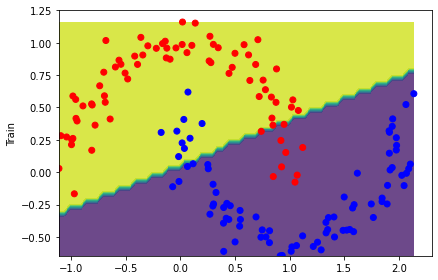

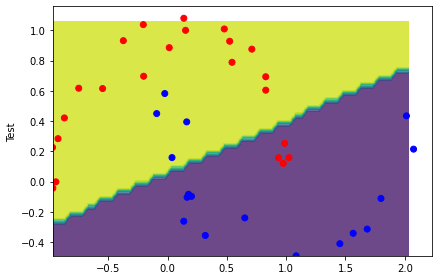

In [11]:
from utils import visualize_2d_classification
f, ax = visualize_2d_classification(perceptron, X_train, y_train)
ax.set_ylabel("Train")
f, ax = visualize_2d_classification(perceptron, X_test, y_test)
ax.set_ylabel("Test")

Recall that a perceptron is nothing more than a linear classifier, which is trying to separate our data using a line. It turns out that the introduction of hidden layers allows us to draw "lines" in higher dimensions, which, when mapped back into our original 2d space,  may look nonlinear.

# Exercise 2:

For the second exercise, use Keras to create a 2-layer neural network by completing build_one_output_model(). Recall that our input is 2-D and output has 2 possible classes, so the neural network will have an input layer of 2. Hence, we will then add one hidden layer and an output layer of 1 (corresponding to our classes--sometimes referred to as a "readout" layer). 

The model has already been initialized and the optimizer and loss function have been defined for you.

For your intermediate layers, use "relu" as the activation function, and "sigmoid" (as the demo above) for your output layer.

In [12]:
# Keras uses the Sequential model for linear stacking of layers.
# That is, creating a neural network is as easy as (later)
# defining the layers!
from keras.models import Sequential
# Everything we've talked about in class so far is referred to in
# Keras as a "dense" connection between layers, where every input
# unit connects to a unit in the next layer
# We will go over specific activation functions throughout the class.
from keras.layers import Dense
# SGD is the learning algorithm we will use
from keras.optimizers import SGD
from keras.layers import Dense, Dropout
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

Q1. Create a 2-layer neural network by completing build_one_output_model().

In [13]:
def build_one_output_model():
    model = Sequential()

    ### YOUR CODE HERE ###
    # Add a input hidden layer with appropriate input dimension
    model.add(Dense(units = 10, input_dim = 2, activation = 'relu', name = 'hidden'))
    # Add a final output layer with 1 unit 
    model.add(Dense(units = 1, activation = 'sigmoid', name = 'output'))

    ######################

    sgd = SGD(lr = 0.001, decay = 1e-7, momentum = 0.9)  #Stochastic gradient descent
    model.compile(loss = "binary_crossentropy", optimizer = sgd, metrics = ['accuracy'])
    return model

In [14]:
model = build_one_output_model()

In [15]:
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
hidden (Dense)               (None, 10)                30        
_________________________________________________________________
output (Dense)               (None, 1)                 11        
Total params: 41
Trainable params: 41
Non-trainable params: 0
_________________________________________________________________
None


Q2. Fit your model by training set

In [16]:
### YOUR CODE HERE ###
model.fit(X_train, y_train, epochs = 500, batch_size = 10, shuffle = True)

8
Epoch 303/500
16/16 [==============================] - 0s 2ms/step - loss: 0.2408 - accuracy: 0.8938
Epoch 304/500
16/16 [==============================] - 0s 2ms/step - loss: 0.2407 - accuracy: 0.8938
Epoch 305/500
16/16 [==============================] - 0s 3ms/step - loss: 0.2405 - accuracy: 0.8938
Epoch 306/500
16/16 [==============================] - 0s 2ms/step - loss: 0.2405 - accuracy: 0.8938
Epoch 307/500
16/16 [==============================] - 0s 2ms/step - loss: 0.2405 - accuracy: 0.8938
Epoch 308/500
16/16 [==============================] - 0s 1ms/step - loss: 0.2406 - accuracy: 0.8938
Epoch 309/500
16/16 [==============================] - 0s 2ms/step - loss: 0.2407 - accuracy: 0.8938
Epoch 310/500
16/16 [==============================] - 0s 2ms/step - loss: 0.2404 - accuracy: 0.8938
Epoch 311/500
16/16 [==============================] - 0s 2ms/step - loss: 0.2404 - accuracy: 0.8938
Epoch 312/500
16/16 [==============================] - 0s 2ms/step - loss: 0.2405 - accur

Q3. Compute accuracy (please do not use get_accuracy())

In [17]:
### YOUR CODE HERE ###
loss, accuracy = model.evaluate(X_train, y_train) #training set
print(f'Accuracy: {accuracy*100:.2f}%')

oss, accuracy = model.evaluate(X_test, y_test) #test set
print(f'Accuracy: {accuracy*100:.2f}%')

5/5 [==============================] - 0s 3ms/step - loss: 0.2341 - accuracy: 0.8938
Accuracy: 89.38%
2/2 [==============================] - 0s 14ms/step - loss: 0.3659 - accuracy: 0.8250
Accuracy: 82.50%


Text(18.625, 0.5, 'Test')

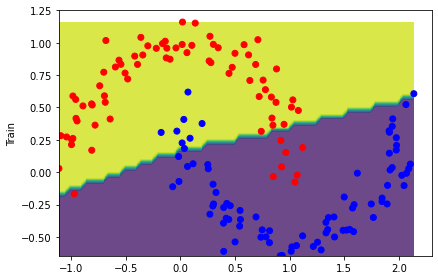

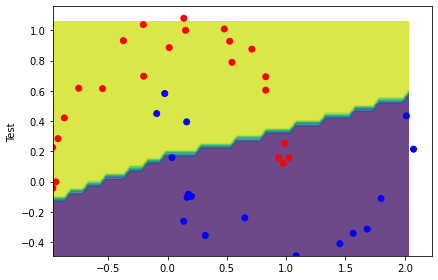

In [18]:
# And visualize how your model did
f, ax = visualize_2d_classification(model, X_train, y_train)
ax.set_ylabel("Train")
f, ax = visualize_2d_classification(model, X_test, y_test)
ax.set_ylabel("Test")


It is actually quite rare for a neural network to have a single output unit as we've implemented above. Usually we have a $k$-unit output layer, where $k$ is your number of outputs. This is typically done because, when combined with the "softmax" activation function, the activity of each unit corresponds to the probability of that class. This allows us to easily extend to multiclass classification.

Now, we will still work with two units, but we will map them to two output units rather than 1. Class 0 will be [1, 0], and class 1 will be [0, 1]. This operation is referred to as "one-hot encoding". It is easy to convert between labels (i.e. [1,2,3]) to their one-hot encoded counterparts:

In [19]:
# Before we can fit the network, we have to one-hot vectorize our response.
# Fortunately, there is a keras method for that.
from keras.utils import to_categorical

y_train_vectorized = to_categorical(y_train)

In [20]:
print("Label | One-hot")
for i in range(10):
    print("{} | {}".format(y_train[i], y_train_vectorized[i]))

Label | One-hot
0 | [1. 0.]
1 | [0. 1.]
1 | [0. 1.]
0 | [1. 0.]
1 | [0. 1.]
0 | [1. 0.]
0 | [1. 0.]
1 | [0. 1.]
0 | [1. 0.]
1 | [0. 1.]


The one-hot encoded vectors will serve as future labels for our models. 

# Exercise 3: 

Q1. Implement build_classification_model(), which returns a sequential model that takes an input of size 2, passes it to a hidden layer of size 10, then a hidden layer of size 5, then a readout layer of size 2. 


As before, use the "relu" activation function for hidden layers. Since we have multiple output units, use the "softmax" activation for the final layer.

The optimizer and loss function have been filled in for you.

In [21]:
def build_classification_model():
    model2 = Sequential()

    ### YOUR CODE HERE ###
    # First add a fully-connected (Dense) hidden layer with appropriate input dimension
    model2.add(Dense(units = 10, input_dim = 2, activation = 'relu', name = 'hidden'))
    model2.add(Dense(units = 5, activation = 'relu', name = 'hidden2'))
    # Now our second hidden layer 
    model2.add(Dense(units = 2, activation = 'softmax', name = 'output'))

    # Finally, add a readout layer

    ######################

    sgd = SGD(lr = 0.001, decay = 1e-7, momentum = .9)  # Stochastic gradient descent
    model2.compile(loss = 'categorical_crossentropy',
                  optimizer = sgd, metrics = ["accuracy"])
    return model

In [22]:
model2 = build_classification_model()

Q2. Fit your model by training set

In [23]:
### YOUR CODE HERE ###
model2.fit(X_train, y_train, epochs = 500, batch_size = 10, shuffle = True)


Epoch 303/500
16/16 [==============================] - 0s 2ms/step - loss: 0.2162 - accuracy: 0.9062
Epoch 304/500
16/16 [==============================] - 0s 2ms/step - loss: 0.2160 - accuracy: 0.9125
Epoch 305/500
16/16 [==============================] - 0s 2ms/step - loss: 0.2160 - accuracy: 0.9062
Epoch 306/500
16/16 [==============================] - 0s 2ms/step - loss: 0.2158 - accuracy: 0.9062
Epoch 307/500
16/16 [==============================] - 0s 2ms/step - loss: 0.2157 - accuracy: 0.9062
Epoch 308/500
16/16 [==============================] - 0s 2ms/step - loss: 0.2158 - accuracy: 0.9062
Epoch 309/500
16/16 [==============================] - 0s 2ms/step - loss: 0.2161 - accuracy: 0.9062
Epoch 310/500
16/16 [==============================] - 0s 1ms/step - loss: 0.2155 - accuracy: 0.9062
Epoch 311/500
16/16 [==============================] - 0s 1ms/step - loss: 0.2155 - accuracy: 0.9125
Epoch 312/500
16/16 [==============================] - 0s 1ms/step - loss: 0.2152 - accura

In [24]:
loss, accuracy = model2.evaluate(X_train, y_train) #training set
print(f'Accuracy: {accuracy*100:.2f}%')

loss, accuracy = model2.evaluate(X_test, y_test) #test set
print(f'Accuracy: {accuracy*100:.2f}%')

5/5 [==============================] - 0s 7ms/step - loss: 0.1956 - accuracy: 0.9187
Accuracy: 91.87%
2/2 [==============================] - 0s 4ms/step - loss: 0.2953 - accuracy: 0.8250
Accuracy: 82.50%


Text(18.625, 0.5, 'Test')

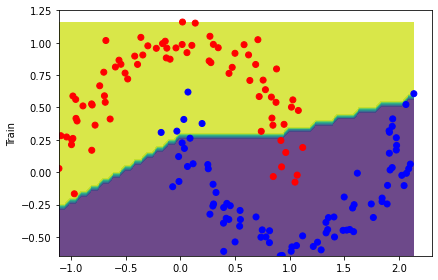

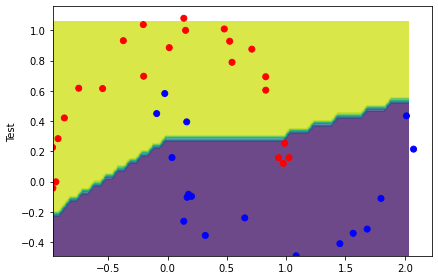

In [25]:
# And visualize how your model did
f, ax = visualize_2d_classification(model2, X_train, y_train)
ax.set_ylabel("Train")
f, ax = visualize_2d_classification(model2, X_test, y_test)
ax.set_ylabel("Test")

# Exercise 4:
### Short answer-questions

Q1. The learning rate is an important parameter for gradient descent. Please briefly describe a possible issue if we choose too high a learning rate for full batch gradient descent (GD). Also, please briefly describe a possible issue if we choose too high a learning
rate for stochastic gradient descent (SGD) that is not a problem in the full-batch setting.

Ans-  
Learning rate in gradient descent can also be thought of as the step size--that is, the size of the step in the direction of steepest descent. Thus, if the learning rate is too large, we may potentially overshoot a local minimum. In some cases, we may also bounce back and forth (zigzag) over a local minimum and potentially fail to converge, leading to a suboptimal solution. In the case of stochastic gradient descent, a learning rate that is too high may lead to a large step in the wrong direction since using only a batch of the data may lead to a gradient that doesn't match the true gradient. Additionally, in the case of a constant learning rate, SGD may get in the general vicinity of the cost function's minimum but roam about instead of getting closer to the true minimum.

Q2. Please give an example in the data augmentation methods that is helpful for classifying images of dogs and cats, but not for classifying handwritten digits. 


Ans-  
Flipping the image would be helpful with dogs and cats because their calssicaication is not dependent on their rotation. This would be ineffective for numbers, however (for example, 6 is a 180 degree rotation of 9). That is, the mirror image of a digit is no longer that same digit. Cropping out parts of a digit may result in an uninterpretable image or a different digit altogether (e.g. if we crop the top part of 7, we may get something that looks like 1).

Q3. Suppose we have the following two neural networks containing fully-connected layers only. 
<div>
<img src="https://ucla.box.com/shared/static/kgninjcbqpztz680q47emsluvituw4ga.jpg" width="300"/>
</div>
Please give one advantage of A over B, and one advantage of B over A

Ans-  
An advantage of B over A is that it has a middle hidden layer by which nonlinear categorization can be achieved for the output units. An advantage of A over B is that has at least the same number of outputs as it does inputs. In this case, if the input were to be an image, for example, the output would retain the same degree of resolution as the initial image (while Network B condenses the input down to 10 neurons and then extrapolates information from those 10 neurons back to 100 outputs, which would likely be ineffective at producing 100 clear categories).


# Exercise 5:

Now let's revisit the classification problem in Homework2. 

income.csv contains the features and has 3706 records. First, 2800 observations are used for training and the remaining observations are used for validation.

income_Xtest.csv contains contains 1000 rows and 14 columns. This is the test set which contains only the features.

Q1. Read the data<br/>
Apply standardization to continuous values<br/> 
Convert categorical variables into one-hot encodings (including the output variable consisting of ">50" or "<=50"). Note that, in neural network, we don't need to drop one category. <br/>
Split data into train and validation set<br/>

In [26]:
### YOUR CODE HERE ###
# Load your training data set and test data
income_learn = pd.read_csv('income.csv')
income_learn_binary = pd.get_dummies(income_learn.iloc[:,-1]).iloc[:,1]
income_learn = income_learn.iloc[:,:-1].join(income_learn_binary)
income_learn = income_learn.rename({' >50K': 'income'}, axis = 'columns')

# Clean the dataset: remove the rows with " ?"
income_learn = income_learn.replace(' ?', np.nan).dropna(axis = 0)

# Split data into X and y
X = income_learn.drop(income_learn.columns[-1], axis=1)
y = pd.DataFrame(income_learn.iloc[:,-1])

#Apply standardization to continuous values and one-hot encoding
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder()
# steps to standardize continuous vars
standard = StandardScaler().fit_transform(X[['age', 'capital-gain', 'capital-loss', 'fnlwgt',
                                             'hours-per-week', 'education-num']])
df_standard = pd.DataFrame(standard)
df_standard = df_standard.rename({0: 'age', 1: 'capital-gain', 2: 'capital-loss', 3: 'fnlwgt',
                                  4: 'hours-per-week', 5: 'education-num'}, axis = 'columns')

# steps to turn categories into dummy vars
x_cat = encoder.fit_transform(X[['workclass', 'education', 'marital-status', 'occupation',
                                 'relationship', 'race', 'sex', 'native-country']])
cat_column_names = encoder.get_feature_names(['workclass', 'education', 'marital-status',
                                              'occupation', 'relationship', 'race', 'sex',
                                              'native-country'])

df_hotcat = pd.DataFrame(x_cat.toarray(), columns = cat_column_names)

# merging categorical and continuous 
X = df_standard.join(df_hotcat)

######################
# Split data into training and validation set
X_train = X.iloc[:2800,:]
y_train = y.iloc[:2800,:]
X_val = X.iloc[2800:,:]
y_val = y.iloc[2800:,:]

In [27]:
# Print out the shape of X_train
X_train.shape

(2800, 102)

Q2. Build a neural network to predict the output in the income dataset. The architecture choice is up to you, but you are required to use Dense layers and dropout layers only.

You can try different numbers of layers, different numbers of units in layers, and experiment with hyperparameters. 

To include regularization, you can include a dropout layer after a hidden layer. In a dropout layer, you can randomly set a fraction rate of input units to 0 at each update during training time, which helps prevent overfitting.

Please build your model in the build_final_model() function

In [28]:
from keras.metrics import Recall
from tensorflow import random

random.set_seed(0)

def build_final_model():
    model3 = Sequential()

    ### YOUR CODE HERE ###
    model3.add(Dense(units = 30, input_dim = 102, activation = 'relu'))
    #model3.add(Dropout(.2))
    model3.add(Dense(units = 20, activation = 'relu'))
    #model3.add(Dropout(.2))
    model3.add(Dense(units = 10, activation = 'relu'))
    model3.add(Dropout(.2))
    model3.add(Dense(units = 5, activation = 'relu'))
    model3.add(Dense(units = 1, activation = 'sigmoid'))

    ######################
    sgd = SGD(lr = 0.005, decay = 1e-7, momentum = .9)  # Stochastic gradient descent
    model3.compile(loss = 'binary_crossentropy', optimizer = sgd, metrics = [Recall()])
    return model3

In [29]:
model3 = build_final_model()

from keras import callbacks
es_callback = callbacks.EarlyStopping(monitor = 'val_loss', patience = 3)

Q3. Fit the model by training set

In [30]:
### YOUR CODE HERE ###
model3.fit(X_train, y_train, epochs = 100, batch_size = 20, shuffle = True,
           validation_data = (X_val, y_val),
           callbacks = [callbacks.EarlyStopping(monitor = 'val_loss', patience = 15)])


Epoch 1/100
140/140 [==============================] - 1s 6ms/step - loss: 0.2490 - recall: 0.0267 - val_loss: 0.7182 - val_recall: 0.0000e+00
Epoch 2/100
140/140 [==============================] - 0s 3ms/step - loss: 0.1642 - recall: 0.0000e+00 - val_loss: 0.6502 - val_recall: 0.0000e+00
Epoch 3/100
140/140 [==============================] - 0s 3ms/step - loss: 0.1562 - recall: 0.0000e+00 - val_loss: 0.6107 - val_recall: 0.0000e+00
Epoch 4/100
140/140 [==============================] - 0s 2ms/step - loss: 0.1475 - recall: 0.0000e+00 - val_loss: 0.5949 - val_recall: 0.0000e+00
Epoch 5/100
140/140 [==============================] - 0s 2ms/step - loss: 0.1451 - recall: 0.0000e+00 - val_loss: 0.6370 - val_recall: 0.0000e+00
Epoch 6/100
140/140 [==============================] - 0s 3ms/step - loss: 0.1440 - recall: 0.0000e+00 - val_loss: 0.6014 - val_recall: 0.0112
Epoch 7/100
140/140 [==============================] - 0s 2ms/step - loss: 0.1392 - recall: 0.0000e+00 - val_loss: 0.6166 - va

Q4. Obtain predictions on validation set and print accuracy, precision, and recall 

In [31]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score

In [32]:
y_pred = model3.predict_classes(X_train)
print(f'Accuracy: {accuracy_score(y_train,y_pred):.4f}')
print(f'Precision: {precision_score(y_train, y_pred):.4f}')
print(f'Recall: {recall_score(y_train, y_pred):.4f}')


Accuracy: 0.9657
Precision: 0.7015
Recall: 0.6267


In [33]:
from sklearn.metrics import accuracy_score,precision_score, recall_score
#obtain predictions on validation set 
### YOUR CODE HERE ###
y_pred = model3.predict_classes(X_val)
# Print accuracy,precision,recall 
### YOUR CODE HERE ###

print(f'Accuracy: {accuracy_score(y_val,y_pred):.4f}')
print(f'Precision: {precision_score(y_val, y_pred):.4f}')
print(f'Recall: {recall_score(y_val, y_pred):.4f}')

Accuracy: 0.7938
Precision: 0.8333
Recall: 0.3652


Q5. Plot the ROC curve by giving appropriate names for title and axes. 

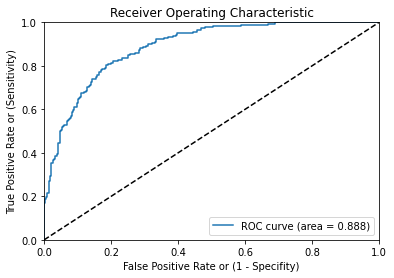

In [34]:
### YOUR CODE HERE ###
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
probs = model3.predict(X_val)
fpr, tpr, thresholds = roc_curve(y_val,probs)
roc_auc = roc_auc_score(y_val,probs)

# method I: plt
import matplotlib.pyplot as plt

plt.plot(fpr, tpr, label='ROC curve (area = %0.3f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate or (1 - Specifity)')
plt.ylabel('True Positive Rate or (Sensitivity)')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")



#### Logistic Regression and Random Forest
In a real world scenario, you can try a number of algorithms for the same problem. Let us work with the same dataset to produce Logistic Regression and Random Forest models. When you transfrom the target as a single binary vector, please make sure >50 is 1, <=50 is 0.

Q6. Implement a function logistic_regression_model that returns a logistic regression model with the best parameters. You can apply any method that we learned before to find the best parameters.

In [35]:
def logistic_regression_model(X_train, y_train):
    ### YOUR CODE HERE ###
    grid = {
        'C': [i for i in np.arange(0.1, 1, 0.05)],
        'penalty': ['l1', 'l2']
    }
    
    # Build model and search
    logi_reg = LogisticRegression()
    # optimize on recall due to imbalanced classes
    grid_search = GridSearchCV(estimator = logi_reg, param_grid = grid, cv = 5, verbose = True,
                               n_jobs = -1, scoring = 'recall')
    grid_search.fit(X_train, y_train)
    print(grid_search.best_params_)
    ######################
    return grid_search.best_estimator_ # Return a logistic model with best parameters you found

Q7. Fit the model by training set, obtain predictions on validation set, and compute accuracy, precision, and recall

In [36]:
lmodel = logistic_regression_model(X_train, y_train)

y_pred = lmodel.predict(X_train)
y_predict = lmodel.predict(X_val)

print('Training')
print(f'Accuracy: {accuracy_score(y_train, y_pred):.4f}')
print(f'Precision: {precision_score(y_train, y_pred):.4f}')
print(f'Recall: {recall_score(y_train, y_pred):.4f}')
print('')
print('Validation')
print(f'Accuracy: {accuracy_score(y_val,y_predict):.4f}')
print(f'Precision: {precision_score(y_val, y_predict):.4f}')
print(f'Recall: {recall_score(y_val, y_predict):.4f}')

Fitting 5 folds for each of 36 candidates, totalling 180 fits
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    6.1s
[Parallel(n_jobs=-1)]: Done 165 out of 180 | elapsed:    8.2s remaining:    0.7s
[Parallel(n_jobs=-1)]: Done 180 out of 180 | elapsed:    8.6s finished
{'C': 0.8000000000000002, 'penalty': 'l2'}
Training
Accuracy: 0.9521
Precision: 0.7105
Recall: 0.1800

Validation
Accuracy: 0.7594
Precision: 0.8298
Recall: 0.2191


Q8. Plot the ROC curve by giving appropriate names for title and axes. 

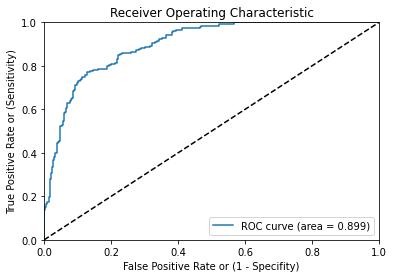

In [37]:
### YOUR CODE HERE ###
probs = lmodel.predict_proba(X_val)[:,1]
fpr, tpr, thresholds = roc_curve(y_val,probs)
roc_auc = roc_auc_score(y_val,probs)

plt.plot(fpr, tpr, label='ROC curve (area = %0.3f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate or (1 - Specifity)')
plt.ylabel('True Positive Rate or (Sensitivity)')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")

Q9. Implement a function random_forest_model that returns a random forest model with the best parameters. You can apply any method that we learned before to find the best parameters (please set the random state to be 26).

In [38]:
from sklearn.ensemble import RandomForestClassifier

def random_forest_model(X_train, y_train):
    grid = {
        'max_depth': [None, 5, 10, 15, 20, 30, 40, 50],
        'max_features': ['sqrt', 'log2'],
        'min_samples_leaf': [1, 2, 3, 4, 5],
        'min_samples_split': [3, 4, 5, 6, 7, 8, 9, 10],
        'n_estimators': [5, 6, 7, 8, 9, 10, 15, 25]
    }

    grid_search = GridSearchCV(estimator = RandomForestClassifier(random_state = 26),
                               param_grid = grid, cv = 5, verbose = True, n_jobs = -1,
                               scoring = 'recall')
    grid_search.fit(X_train, y_train)

    return grid_search.best_estimator_ # Return a random forest model with best parameters

Q10. Fit the model by training set, obtain predictions on validation set, and compute accuracy, precision, recall

In [39]:
# fit the model
# obtain predictions on validation set and compute accuracy, precision, and recall
### YOUR CODE HERE ###
rf = random_forest_model(X_train, y_train)

y_pred = rf.predict(X_train)
y_predict = rf.predict(X_val)

print('Training')
print(f'Accuracy: {accuracy_score(y_train, y_pred):.4f}')
print(f'Precision: {precision_score(y_train, y_pred):.4f}')
print(f'Recall: {recall_score(y_train, y_pred):.4f}')
print('')
print('Validation')
print(f'Accuracy: {accuracy_score(y_val,y_predict):.4f}')
print(f'Precision: {precision_score(y_val, y_predict):.4f}')
print(f'Recall: {recall_score(y_val, y_predict):.4f}')

Fitting 5 folds for each of 5120 candidates, totalling 25600 fits
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:    1.7s
[Parallel(n_jobs=-1)]: Done 352 tasks      | elapsed:    9.9s
[Parallel(n_jobs=-1)]: Done 852 tasks      | elapsed:   22.5s
[Parallel(n_jobs=-1)]: Done 1552 tasks      | elapsed:   40.4s
[Parallel(n_jobs=-1)]: Done 2452 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done 3552 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 4852 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done 6352 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 8052 tasks      | elapsed:  2.1min
[Parallel(n_jobs=-1)]: Done 9952 tasks      | elapsed:  2.4min
[Parallel(n_jobs=-1)]: Done 12052 tasks      | elapsed:  2.7min
[Parallel(n_jobs=-1)]: Done 14352 tasks      | elapsed:  3.1min
[Parallel(n_jobs=-1)]: Done 16852 tasks      | elapsed:  3.5min
[Parallel(n_jobs=-1)]: Done 19552 tasks

Q11. Plot the ROC curve by giving appropriate names for title and axes.

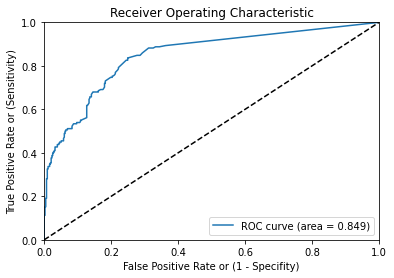

In [40]:
### YOUR CODE HERE ###
probs = rf.predict_proba(X_val)[:,1]
fpr, tpr, thresholds = roc_curve(y_val,probs)
roc_auc = roc_auc_score(y_val,probs)

plt.plot(fpr, tpr, label='ROC curve (area = %0.3f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate or (1 - Specifity)')
plt.ylabel('True Positive Rate or (Sensitivity)')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")

Q12: Which of the above 3 models worked best for you? Explain in details the reason for good/bad performance for each of the models.

Ans-   
In terms of recall, the neural network gave us the best results on the validation set. We focused on recall due to the high class imbalance in the data. 

The neural network was difficult to train consistently and was really sensitive to overfitting. We resolved this by using callbacks and dropout layers.

The Random Forest and Logistic Regression models in general are more tractable but are limited in their ability to find new relationships in the data that can be useful in predicting y.

Using the best of the above 3 models, obtain predictions for the test set.

In [41]:
income_test = pd.read_csv("income_Xtest.csv")

income_test = income_test.replace(' ?', np.nan).dropna(axis = 0)
X = income_learn.drop(income_learn.columns[-1], axis=1)

standard = StandardScaler().fit(income_learn[['age', 'capital-gain', 'capital-loss', 'fnlwgt',
                                              'hours-per-week', 'education-num']])
standard = standard.transform(income_test[['age', 'capital-gain', 'capital-loss', 'fnlwgt',
                                           'hours-per-week', 'education-num']])
df_standard = pd.DataFrame(standard)
df_standard = df_standard.rename({0: 'age', 1: 'capital-gain', 2: 'capital-loss', 3: 'fnlwgt',
                                  4: 'hours-per-week', 5: 'education-num'}, axis = 'columns')

x_test_cat = encoder.fit(X[['workclass', 'education', 'marital-status', 'occupation',
                            'relationship', 'race', 'sex', 'native-country']])
income_test_cat = encoder.transform(income_test[['workclass', 'education', 'marital-status',
                                                 'occupation', 'relationship', 'race', 'sex',
                                                 'native-country']])
cat_column_names = encoder.get_feature_names(['workclass', 'education', 'marital-status',
                                              'occupation', 'relationship', 'race', 'sex',
                                              'native-country'])

income_test_hotcat = pd.DataFrame(income_test_cat.toarray(), columns = cat_column_names)

transformed_income_test = df_standard.join(income_test_hotcat)
transformed_income_test

,age,capital-gain,capital-loss,fnlwgt,hours-per-week,education-num,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Private,workclass_ Self-emp-inc,...,native-country_ Portugal,native-country_ Puerto-Rico,native-country_ Scotland,native-country_ South,native-country_ Taiwan,native-country_ Thailand,native-country_ Trinadad&Tobago,native-country_ United-States,native-country_ Vietnam,native-country_ Yugoslavia
0,-0.018188,-0.123479,-0.191138,-0.387121,-0.008782,-1.168376,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.510778,-0.123479,-0.191138,0.939260,1.669460,0.050007,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,1.493145,-0.123479,-0.191138,-1.311084,-1.267464,0.050007,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,-0.622722,-0.123479,-0.191138,1.931949,-0.008782,0.050007,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,1.342012,-0.123479,-0.191138,0.053201,0.830339,-0.356121,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
921,-0.018188,-0.123479,-0.191138,2.730260,0.830339,0.050007,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
922,-1.227255,-0.123479,-0.191138,-0.736341,-2.106585,0.050007,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
923,0.888612,-0.123479,-0.191138,-0.254545,-0.008782,0.050007,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
924,0.132945,-0.123479,-0.191138,-1.290894,0.830339,1.674518,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [42]:
### YOUR CODE HERE ###
y_pred = model3.predict_classes(transformed_income_test)

# Exercise 6

### Convolution Neural Netwrok

In neural networks, Convolutional neural networks (ConvNets or CNNs) are one of the main categories of neural networks used for image recognition and image classification. Object detection, facial recognition, etc., are some of the areas where CNNs are widely used.

Usually, to train and test CNN models, each input image will pass it through a series of convolution layers with filters (Kernals), Pooling layers, fully-connected layers (FC), and eventually a Softmax function to classify an object with probabilistic values between 0 and 1. 

The dataset which we will use in this part is the MNIST digits classification dataset. This is a dataset of 60,000 28x28 images of the 10 digits, along with a test set of 10,000 images.

In [43]:
from keras.datasets import mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [44]:
print(x_train.shape)

(60000, 28, 28)


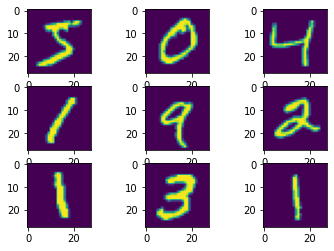

In [45]:
import matplotlib.pyplot as plt
# plot first few images
for i in range(9):
    # define subplot
    plt.subplot(330 + 1 + i)
    # plot raw pixel data
    plt.imshow(x_train[i])
# show the figure
plt.show()

Q1. To process images in neural networks, we have to indicate how may channels (depth) we are going to use. For instance, a coloful image from a standard digital camera will have a red, green and blue channel (RGB), so it has 3 channels (i.e. depth = 3) in total, whereas a grayscale image only has 1 channel (depth = 1).

Please reshape MNIST to indicate each image only contains 1 channel (depth = 1). 

In [46]:
### YOUR CODE HERE ###
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)

print(x_train.shape)

(60000, 28, 28, 1)


The pixel values for each image in the dataset are unsigned integers in the range between black and white, or 0 and 255.

Q2. Normalize the pixel values of grayscale images, e.g. rescale them to the range [0, 1]. 

In [47]:
### YOUR CODE HERE ###
x_train = x_train/255
x_test = x_test/255

Q3. You also need to encode the target values into binary values (one-hot encoding)

In [48]:
### YOUR CODE HERE ###
y_train = encoder.fit_transform(y_train.reshape(-1,1)).toarray()
y_test = encoder.fit_transform(y_test.reshape(-1,1)).toarray()

Q4. Implement build_cnn_model(), which returns a CNN model that takes an image as input and passes it to:
- A convolution layer with kernel size 5x5
- A MaxPool layer of size 2x2
- Another convolution layer with kernel size 5x5
- Another MaxPool layer of size 2x2
- Flatten it
- Add one fully-connected layer
- Finally, output your classification by another fully-connected layer

The number of units/fitlers in each convolution/full-connected layer is determined by you. Remember that your goal is to minimize the entropy loss.

As before, use the "relu" activation function for all the convolution/full-connected layers, but use the "softmax" activation for the final fully-connected layer (readout layer).

The optimizer and loss function have been filled in for you.

In [49]:
from keras.layers import Conv2D, MaxPool2D
from keras.layers import Dense, Flatten, Input

def build_cnn_model():
    model4 = Sequential()
    ### YOUR CODE HERE ###
    model4.add(Conv2D(32, kernel_size = (5, 5), activation = "relu"))
    model4.add(MaxPool2D(pool_size = (2, 2)))
    model4.add(Conv2D(64, kernel_size = (5, 5), activation = "relu"))
    model4.add(MaxPool2D(pool_size = (2, 2)))
    model4.add(Flatten())
    model4.add(Dropout(0.5))
    model4.add(Dense(20, activation = "relu"))
    model4.add(Dense(10, activation = "softmax"))
    ######################
    model4.compile(optimizer = 'adam',loss = 'categorical_crossentropy', metrics = ['accuracy'])

    return model4

model4 = build_cnn_model()

Q5. Fit your CNN model by x_train, y_train

In [50]:
### YOUR CODE HERE ###
model4.fit(x_train, y_train, epochs = 500, batch_size = 20, shuffle = True,
           validation_data = (x_test, y_test), callbacks = [es_callback])

Epoch 1/500
3000/3000 [==============================] - 26s 9ms/step - loss: 0.1984 - accuracy: 0.9373 - val_loss: 0.0432 - val_accuracy: 0.9856
Epoch 2/500
3000/3000 [==============================] - 28s 9ms/step - loss: 0.0689 - accuracy: 0.9783 - val_loss: 0.0357 - val_accuracy: 0.9880
Epoch 3/500
3000/3000 [==============================] - 28s 9ms/step - loss: 0.0523 - accuracy: 0.9837 - val_loss: 0.0284 - val_accuracy: 0.9901
Epoch 4/500
3000/3000 [==============================] - 28s 9ms/step - loss: 0.0458 - accuracy: 0.9861 - val_loss: 0.0277 - val_accuracy: 0.9900
Epoch 5/500
3000/3000 [==============================] - 31s 10ms/step - loss: 0.0404 - accuracy: 0.9873 - val_loss: 0.0237 - val_accuracy: 0.9926
Epoch 6/500
3000/3000 [==============================] - 31s 10ms/step - loss: 0.0354 - accuracy: 0.9890 - val_loss: 0.0214 - val_accuracy: 0.9928
Epoch 7/500
3000/3000 [==============================] - 30s 10ms/step - loss: 0.0331 - accuracy: 0.9895 - val_loss: 0.022

In [51]:
print(model4.summary())

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (20, 24, 24, 32)          832       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (20, 12, 12, 32)          0         
_________________________________________________________________
conv2d_1 (Conv2D)            (20, 8, 8, 64)            51264     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (20, 4, 4, 64)            0         
_________________________________________________________________
flatten (Flatten)            (20, 1024)                0         
_________________________________________________________________
dropout_1 (Dropout)          (20, 1024)                0         
_________________________________________________________________
dense_5 (Dense)              (20, 20)                 

Q6. Evaluate your model on the test set and print out the entropy loss and accuracy

In [52]:
### YOUR CODE HERE ###
loss, accuracy = model4.evaluate(x_test, y_test)
print(f'Loss: {loss:.4f}')
print(f'Accuracy: {accuracy*100:.2f}%')


313/313 [==============================] - 1s 4ms/step - loss: 0.0230 - accuracy: 0.9925
Loss: 0.0230
Accuracy: 99.25%


Q7. Now, let's check the performance of multi-layer perceptrons (MLPs) in image classfication. Implement build_mlp_model() that returns an MLP model that takes an image as input, passes it to 1 flatten layer and 3 fully-connected layers.

The number of units in each fully-connected layer is determined by yourself. Remember that your goal is to minimize the entropy loss.

As before, use the "relu" activation function for the first 2 fully-connected layers, but use the "softmax" activation for the final fully-connected layer (readout layer).

The optimizer and loss function have been filled in for you.

In [53]:
def build_mlp_model():
    model5 = Sequential()
    ### YOUR CODE HERE ###
    model5.add(Flatten())
    model5.add(Dense(128, activation = "relu"))
    model5.add(Dense(64, activation = "relu"))
    model5.add(Dense(10, activation = "softmax"))
    ######################
    model5.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

    return model5

model5 = build_mlp_model()

Q8. Fit your MLP model by x_train, y_train. (Please use the same parameters with those in CNN model for comparison)  

In [54]:
y_train.shape

(60000, 10)

In [55]:
### YOUR CODE HERE ###
model5.fit(x_train, y_train, epochs = 500, batch_size = 20, shuffle = True,
           validation_data = (x_test, y_test), callbacks = [es_callback])

Epoch 1/500
3000/3000 [==============================] - 3s 1ms/step - loss: 0.2242 - accuracy: 0.9345 - val_loss: 0.1082 - val_accuracy: 0.9651
Epoch 2/500
3000/3000 [==============================] - 3s 1ms/step - loss: 0.0970 - accuracy: 0.9716 - val_loss: 0.1096 - val_accuracy: 0.9656
Epoch 3/500
3000/3000 [==============================] - 3s 985us/step - loss: 0.0683 - accuracy: 0.9781 - val_loss: 0.0943 - val_accuracy: 0.9705
Epoch 4/500
3000/3000 [==============================] - 3s 1ms/step - loss: 0.0520 - accuracy: 0.9836 - val_loss: 0.0931 - val_accuracy: 0.9732
Epoch 5/500
3000/3000 [==============================] - 3s 1ms/step - loss: 0.0435 - accuracy: 0.9858 - val_loss: 0.0837 - val_accuracy: 0.9762
Epoch 6/500
3000/3000 [==============================] - 4s 1ms/step - loss: 0.0325 - accuracy: 0.9895 - val_loss: 0.0833 - val_accuracy: 0.9778
Epoch 7/500
3000/3000 [==============================] - 4s 1ms/step - loss: 0.0302 - accuracy: 0.9899 - val_loss: 0.0854 - val_

Q9. Evaluate your model on test set and print out the entropy loss and accuracy

In [56]:
### YOUR CODE HERE ###
loss, accuracy = model5.evaluate(x_test, y_test)
print(f'Loss: {loss:.4f}')
print(f'Accuracy: {accuracy*100:.2f}%')

313/313 [==============================] - 0s 944us/step - loss: 0.0843 - accuracy: 0.9813
Loss: 0.0843
Accuracy: 98.13%


Q10. Which of the above 2 models worked best for you? Explain in detail the reason for good/bad performance for each of the models.

Ans-  
The CNN model performs better because the convolution and pooling layers allow for learning the relationships between nearby pixels, which is a more efficient way to discover features in an image. The MLP model cannot do this and thus has to look at the entire flattened set of pixels instead.

# Exercise 7
### Autoencoder

So far, we have learned a lot about how to use neural networks in supervised learning, but there are also many applications of neural networks in unsupervised learning. One of these examples is autoencoders.

An autoencoder is a special type of neural network that is trained to copy its input to its output. For example, given an image of a handwritten digit, an autoencoder first encodes the image into a lower dimensional latent representation, then decodes the latent representation back to an image. An autoencoder learns to compress the data while minimizing the reconstruction error.

In this exercise, we will continue using MNIST dataset.

Q1. Implement an autoencoder model that takes an input of 28x28x1 images, compresses them into (4,) vectors by an encoder, and then decompress them back to 28x28 images by a decoder. In other words, the orginal dimensionality is 784 (=28x28), but we want to compress them into the dimensionality of 4 by an encoder, then reconstruct these (4,) vectors back to 28x28 images by an decoder.

You only need to define an encoder and a decoder by adding several layers. In your encoder, you are required to inlude a flatten layer and several fully-connected layers, while in your decoder, you are required to use fully-connected layers and one reshape layer. Do not use any other types of layers.

You need to determine the number of fully-connected layers, number of units, and activation functions by yourself. Remember that your goal is to the minimize validation loss of your reconstructed images.

The optimizer and loss function have been filled in for you.

In [106]:
from keras.models import Model
from keras.layers import Reshape, Input
# encoder layers
encoding_dim = 4
encoded = Sequential()
# You don't need to build a new function, just add the layers
### YOUR CODE HERE ###
encoded.add(Input(shape = (28, 28, 1)))
encoded.add(Flatten())
encoded.add(Dense(28*14, activation = 'relu'))
encoded.add(Dense(28, activation = 'relu'))
encoded.add(Dense(14, activation = 'relu'))
encoded.add(Dense(encoding_dim, activation = 'relu'))
######################
# decoder layers
decoded = Sequential()
### YOUR CODE HERE ###
decoded.add(Dense(encoding_dim, input_shape = (4,), activation = 'relu'))
decoded.add(Dense(14, activation = 'relu'))
decoded.add(Dense(28, activation = 'relu'))
decoded.add(Dense(28*14, activation = 'relu'))
decoded.add(Dense(28*28, activation = 'relu'))
decoded.add(Reshape((28, 28, 1)))
######################
input_x = Input(shape = (28, 28, 1))
code = encoded(input_x)
output = decoded(code)
autoencoder = Model(input_x,output)
autoencoder.compile(optimizer = 'adam', loss = 'mse')

Q2. Fit your model by x_train only

In [107]:
### YOUR CODE HERE ###
autoencoder.fit(x_train, x_train, epochs = 500, batch_size = 50, shuffle = True,
                validation_data = (x_test, x_test), callbacks = [es_callback])

Epoch 1/500
1200/1200 [==============================] - 5s 4ms/step - loss: 0.0486 - val_loss: 0.0389
Epoch 2/500
1200/1200 [==============================] - 5s 4ms/step - loss: 0.0370 - val_loss: 0.0357
Epoch 3/500
1200/1200 [==============================] - 5s 5ms/step - loss: 0.0349 - val_loss: 0.0347
Epoch 4/500
1200/1200 [==============================] - 6s 5ms/step - loss: 0.0338 - val_loss: 0.0336
Epoch 5/500
1200/1200 [==============================] - 5s 4ms/step - loss: 0.0330 - val_loss: 0.0329
Epoch 6/500
1200/1200 [==============================] - 5s 4ms/step - loss: 0.0319 - val_loss: 0.0316
Epoch 7/500
1200/1200 [==============================] - 5s 4ms/step - loss: 0.0313 - val_loss: 0.0316
Epoch 8/500
1200/1200 [==============================] - 5s 4ms/step - loss: 0.0308 - val_loss: 0.0309
Epoch 9/500
1200/1200 [==============================] - 5s 4ms/step - loss: 0.0303 - val_loss: 0.0304
Epoch 10/500
1200/1200 [==============================] - 6s 5ms/step - l

Q3. Test your autoencoder on test set, print out the MSE and output images as numpy arrays

In [108]:
# Test your autoencoder on test set, print out the MSE
### YOUR CODE HERE ###
ei = encoded.predict(x_test)
decoded.predict(ei)

mse = autoencoder.evaluate(x_test, x_test)
print(f'Loss: {mse:.4f}')

######################
# output images as numpy arrays
encoded_imgs = encoded(x_test).numpy()
decoded_imgs = decoded(encoded_imgs).numpy()

313/313 [==============================] - 1s 2ms/step - loss: 0.0279
Loss: 0.0279


Plot your encoded image

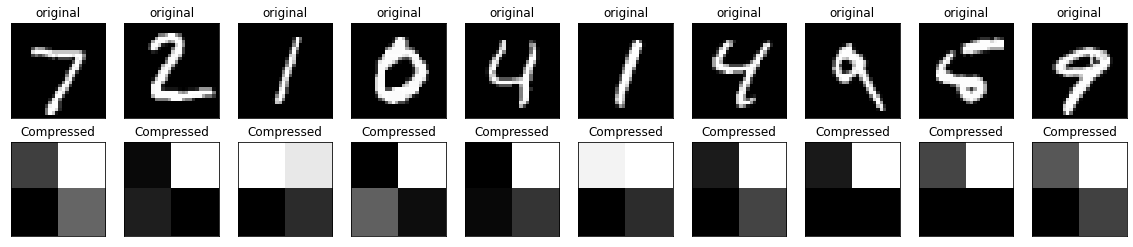

In [109]:
n = 10
plt.figure(figsize = (20, 4))
for i in range(n):
  # display original
  ax = plt.subplot(2, n, i + 1)
  plt.imshow(x_test[i].reshape(28, 28))
  plt.title("original")
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)

  # display reconstruction
  ax = plt.subplot(2, n, i + 1 + n)
  plt.imshow(encoded_imgs[i].reshape(2,2))
  plt.title("Compressed")
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)
plt.show()

Plot your decoded image

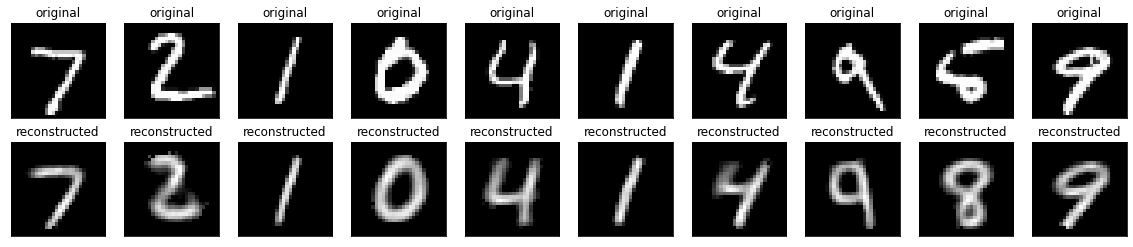

In [110]:
n = 10
plt.figure(figsize = (20, 4))
for i in range(n):
  # display original
  ax = plt.subplot(2, n, i + 1)
  plt.imshow(x_test[i].reshape(28, 28))
  plt.title("original")
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)

  # display reconstruction
  ax = plt.subplot(2, n, i + 1 + n)
  plt.imshow(decoded_imgs[i].reshape(28, 28))
  plt.title("reconstructed")
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)
plt.show()

# Exercise 8
### Denoising Autoencoder

Except fully-connected layers, an autoencoder can also consist of other types of layers such as CNN or RNN. Here, we will see an example with convolution layers.

Denoising autoencoders are an extension of the basic autoencoder, and represent a stochastic version of it. Denoising autoencoders attempt to address identity-function risk by randomly corrupting input (i.e. introducing noise) that the autoencoder must then reconstruct, or denoise.

Again, we will continue using MNIST dataset.

In [111]:
# Add some white noise into the original MNIST images
import numpy as np
noise_factor = 0.5
x_train_noisy = x_train + noise_factor * np.random.normal(loc = 0.0, scale=1.0,
                                                          size = x_train.shape) 
x_test_noisy = x_test + noise_factor * np.random.normal(loc = 0.0, scale = 1.0,
                                                        size = x_test.shape) 
x_train_noisy = np.clip(x_train_noisy, 0., 1.)
x_test_noisy = np.clip(x_test_noisy, 0., 1.)

Plot the noised images

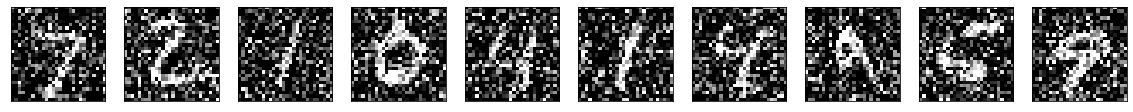

In [112]:
n = 10
plt.figure(figsize = (20, 2))
for i in range(n):
    ax = plt.subplot(1, n, i + 1)
    plt.imshow(x_test_noisy[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

Q1. Implement an CNN autoencoder model consisting of an encoder and a decoder. 

The encoder takes an image as input, passes it to 
- A convolution layer
- A MaxPool layer
- Another convolution layer 
- Another MaxPool layer

The decoder takes the output of the encoder as the input, passes it to 
- A convolution layer
- An UpSampling layer
- Another convolution layer
- Another UpSampling layer
- Another convolution layer

As in exercise 6, the number of filters in each convolution layer is determined by you. In addition, you are also required to determine the kernel/pool/upsampling size of each layer. Remember that your goal is to minimize the entropy loss.<br/>
Use the SAME padding for all the convolution and max pooling layers.<br/>
Use the "relu" activation function for all the hidden layers, but use the "sigmoid" activation for the final convolution layer.


(An upsampling layer is a simple layer with no weights that will enlarge the dimensions of input )

The optimizer and loss function have been filled in for you.

In [113]:
from keras.layers import UpSampling2D
# encoder layers
encoded2 = Sequential()
# You don't need to build a new function, just add the layers
### YOUR CODE HERE ###
encoded2.add(Conv2D(28, kernel_size = (4, 4), activation = "relu", padding = "same"))
encoded2.add(MaxPool2D(pool_size = (2, 2), padding = "same"))
encoded2.add(Conv2D(28, kernel_size = (4, 4), activation = "relu", padding = "same"))
encoded2.add(MaxPool2D(pool_size = (2, 2), padding = "same"))
######################

# decoder layers
decoded2 = Sequential()
### YOUR CODE HERE ###
decoded2.add(Conv2D(28, kernel_size = (4, 4), activation = "relu", padding = "same"))
decoded2.add(UpSampling2D(size = (2, 2)))
decoded2.add(Conv2D(28, kernel_size = (4, 4), activation = "relu", padding = "same"))
decoded2.add(UpSampling2D(size = (2, 2)))
decoded2.add(Conv2D(1, kernel_size = (4, 4), activation = "sigmoid", padding = "same"))
######################

input_x = Input(shape = (28, 28, 1)) #why were there variables here?
code = encoded2(input_x)
output = decoded2(code)

autoencoder2 = Model(input_x,output)

autoencoder2.compile(optimizer = 'adadelta', loss = 'binary_crossentropy')

Q2. Fit your model by x_train_noisy and x_train

In [114]:
print(autoencoder2.summary())

Model: "functional_25"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_25 (InputLayer)        [(None, 28, 28, 1)]       0         
_________________________________________________________________
sequential_30 (Sequential)   (None, 7, 7, 28)          13048     
_________________________________________________________________
sequential_31 (Sequential)   (None, 28, 28, 1)         25593     
Total params: 38,641
Trainable params: 38,641
Non-trainable params: 0
_________________________________________________________________
None


In [115]:
### YOUR CODE HERE ###
autoencoder2.fit(x_train_noisy, x_train, epochs = 300, batch_size = 256, shuffle = True,
                 validation_data = (x_test_noisy, x_test), callbacks = [es_callback])

===================] - 71s 303ms/step - loss: 0.1729 - val_loss: 0.1716
Epoch 113/300
235/235 [==============================] - 72s 306ms/step - loss: 0.1725 - val_loss: 0.1713
Epoch 114/300
235/235 [==============================] - 71s 303ms/step - loss: 0.1721 - val_loss: 0.1709
Epoch 115/300
235/235 [==============================] - 71s 300ms/step - loss: 0.1717 - val_loss: 0.1705
Epoch 116/300
235/235 [==============================] - 71s 303ms/step - loss: 0.1713 - val_loss: 0.1701
Epoch 117/300
235/235 [==============================] - 71s 303ms/step - loss: 0.1710 - val_loss: 0.1697
Epoch 118/300
235/235 [==============================] - 73s 313ms/step - loss: 0.1706 - val_loss: 0.1693
Epoch 119/300
235/235 [==============================] - 73s 312ms/step - loss: 0.1702 - val_loss: 0.1690
Epoch 120/300
235/235 [==============================] - 73s 311ms/step - loss: 0.1699 - val_loss: 0.1686
Epoch 121/300
235/235 [==============================] - 74s 315ms/step - loss: 

Q3. Evaluate your model on test set and print out the entropy loss

In [116]:
### YOUR CODE HERE ###
loss = autoencoder2.evaluate(x_test_noisy, x_test)
print(f'Loss: {loss:.4f}')

313/313 [==============================] - 4s 11ms/step - loss: 0.1377
Loss: 0.1377


Plot your noised images and their corresponding reconstructed images

In [118]:
encoded_imgs2 = encoded2(x_test).numpy()
decoded_imgs2 = decoded2(encoded_imgs2).numpy()

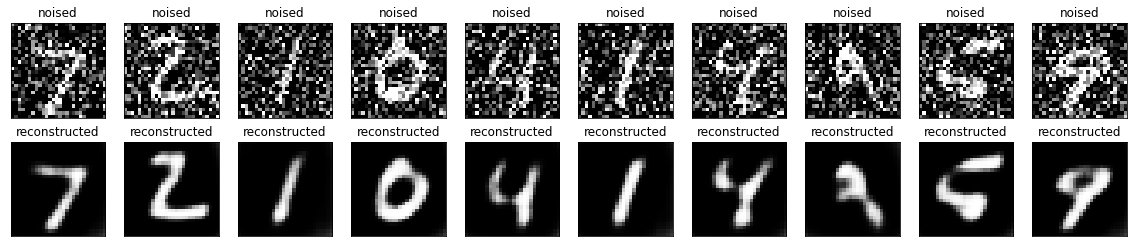

In [119]:
n = 10
plt.figure(figsize = (20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test_noisy[i].reshape(28, 28))
    plt.title("noised")
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs2[i].reshape(28, 28))
    plt.title("reconstructed")
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

# END